# Reto | Análisis del progreso mundial de vacunación

In [4]:
# Se carga el archivo desde el local filesystem
from google.colab import files

uploaded = files.upload()

Saving country_vaccinations.csv to country_vaccinations.csv


In [2]:
# Se importan las librerias que se pueden necesitar:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# Se lee el archivo
file_path = '/content/country_vaccinations.csv'
data = pd.read_csv(file_path)

In [ ]:
data.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


In [6]:
# Revisamos el formato(data type) de las columnas
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86512 entries, 0 to 86511
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              86512 non-null  object 
 1   iso_code                             86512 non-null  object 
 2   date                                 86512 non-null  object 
 3   total_vaccinations                   43607 non-null  float64
 4   people_vaccinated                    41294 non-null  float64
 5   people_fully_vaccinated              38802 non-null  float64
 6   daily_vaccinations_raw               35362 non-null  float64
 7   daily_vaccinations                   86213 non-null  float64
 8   total_vaccinations_per_hundred       43607 non-null  float64
 9   people_vaccinated_per_hundred        41294 non-null  float64
 10  people_fully_vaccinated_per_hundred  38802 non-null  float64
 11  daily_vaccinations_per_milli

In [ ]:
# La fecha se encuentra en formato de 'object', vamos a cambiarlo por 'date'
data['date'] =  pd.to_datetime(data['date'], format='%Y-%m-%d')

##Adicional

Se realizaron actividades adicionales con el fin de practica. Realmente fue por pura curiosidad mientras se realizaba el reto.
Las actividades relacionadas con el Reto se encuentran al final de la libreta.

###México

In [ ]:
# Se va a guardar la información referente a México en un nuevo DataFrame
df_mx = data[data['country'] == 'Mexico'].copy()
df_mx.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
49887,Mexico,MEX,2020-12-24,2924.0,2924.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,"CanSino, Johnson&Johnson, Moderna, Oxford/Astr...",Secretary of Health,http://www.gob.mx/cms/uploads/attachment/file/...
49888,Mexico,MEX,2020-12-25,NaN,NaN,NaN,NaN,1300.0,NaN,NaN,NaN,10.0,"CanSino, Johnson&Johnson, Moderna, Oxford/Astr...",Secretary of Health,http://www.gob.mx/cms/uploads/attachment/file/...
49889,Mexico,MEX,2020-12-26,NaN,NaN,NaN,NaN,1300.0,NaN,NaN,NaN,10.0,"CanSino, Johnson&Johnson, Moderna, Oxford/Astr...",Secretary of Health,http://www.gob.mx/cms/uploads/attachment/file/...
49890,Mexico,MEX,2020-12-27,6824.0,6824.0,NaN,NaN,1300.0,0.01,0.01,NaN,10.0,"CanSino, Johnson&Johnson, Moderna, Oxford/Astr...",Secretary of Health,http://www.gob.mx/cms/uploads/attachment/file/...
49891,Mexico,MEX,2020-12-28,9579.0,9579.0,NaN,2755.0,1664.0,0.01,0.01,NaN,13.0,"CanSino, Johnson&Johnson, Moderna, Oxford/Astr...",Secretary of Health,http://www.gob.mx/cms/uploads/attachment/file/...


In [ ]:
# Vamos a eliminar algunas columans de las que no haremos uso
df_mx.drop(["people_fully_vaccinated","daily_vaccinations_raw","people_fully_vaccinated_per_hundred","daily_vaccinations_per_million","people_vaccinated_per_hundred", "source_name","source_website"],axis=1, inplace=True)

In [ ]:
df_mx.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,vaccines
49887,Mexico,MEX,2020-12-24,2924.0,2924.0,NaN,0.00,"CanSino, Johnson&Johnson, Moderna, Oxford/Astr..."
49888,Mexico,MEX,2020-12-25,NaN,NaN,1300.0,NaN,"CanSino, Johnson&Johnson, Moderna, Oxford/Astr..."
49889,Mexico,MEX,2020-12-26,NaN,NaN,1300.0,NaN,"CanSino, Johnson&Johnson, Moderna, Oxford/Astr..."
49890,Mexico,MEX,2020-12-27,6824.0,6824.0,1300.0,0.01,"CanSino, Johnson&Johnson, Moderna, Oxford/Astr..."
49891,Mexico,MEX,2020-12-28,9579.0,9579.0,1664.0,0.01,"CanSino, Johnson&Johnson, Moderna, Oxford/Astr..."


In [ ]:
# Eliminaremos las fechas en las que faltan valores.
df_mx.drop(df_mx.index[df_mx['total_vaccinations'] == 0], inplace = True)

In [ ]:
df_mx.tail()

,country,iso_code,date,total_vaccinations,people_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,vaccines
50343,Mexico,MEX,2022-03-25,189804498.0,85556080.0,234906.0,145.71,"CanSino, Johnson&Johnson, Moderna, Oxford/Astr..."
50344,Mexico,MEX,2022-03-26,190197035.0,85566651.0,247902.0,146.01,"CanSino, Johnson&Johnson, Moderna, Oxford/Astr..."
50345,Mexico,MEX,2022-03-27,190337668.0,85573127.0,224913.0,146.12,"CanSino, Johnson&Johnson, Moderna, Oxford/Astr..."
50346,Mexico,MEX,2022-03-28,190441475.0,85575818.0,226775.0,146.20,"CanSino, Johnson&Johnson, Moderna, Oxford/Astr..."
50347,Mexico,MEX,2022-03-29,191907868.0,85580293.0,431743.0,147.32,"CanSino, Johnson&Johnson, Moderna, Oxford/Astr..."


In [ ]:
# Crearemos un DataFrame para cada año que se encuentra registrado:
mx_uno = df_mx[(df_mx['date'] >= '2020-01-01') & (df_mx['date'] <= '2020-12-31')] # 2020
mx_dos = df_mx[(df_mx['date'] >= '2021-01-01') & (df_mx['date'] <= '2021-12-31')] # 2021
mx_tres = df_mx[(df_mx['date'] >= '2022-01-01') & (df_mx['date'] <= '2022-12-31')] # 2022

####Total de Vacunas por año en México

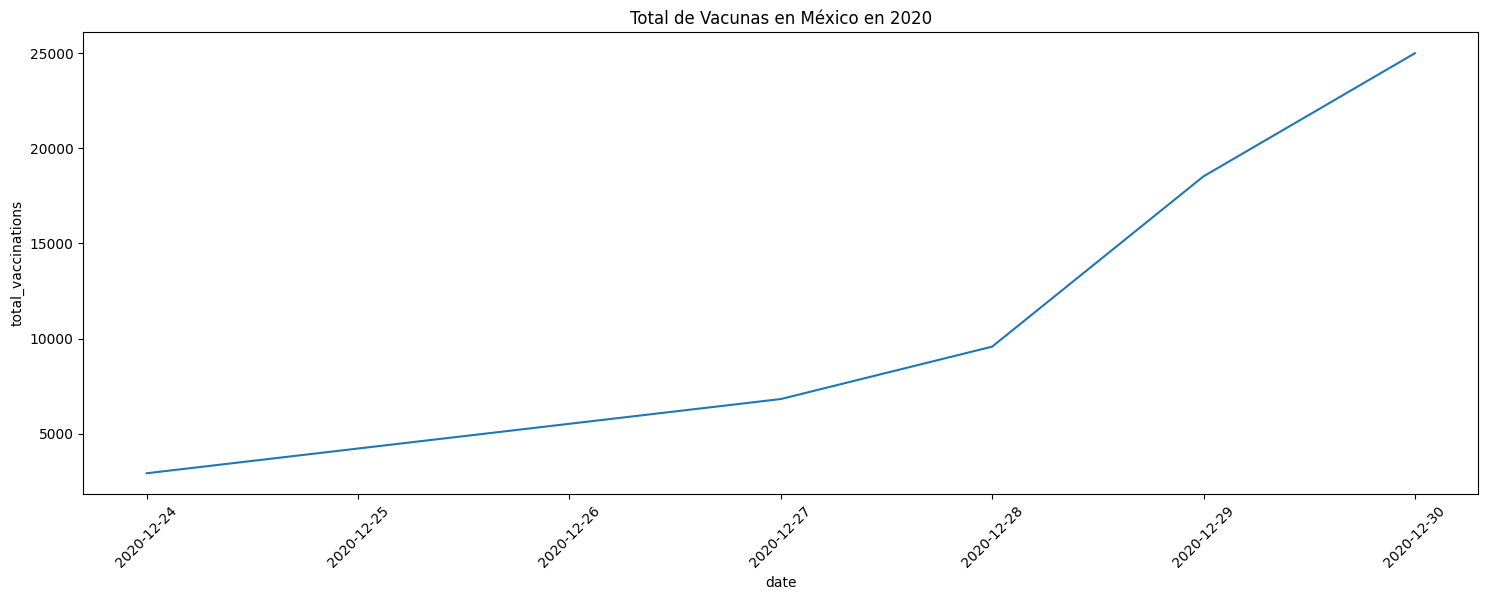

In [ ]:
plt.figure(figsize=(18,6))
sns.lineplot(data=mx_uno, x="date", y="total_vaccinations")
plt.title("Total de Vacunas en México en 2020")
plt.xticks(rotation=45)
plt.show()

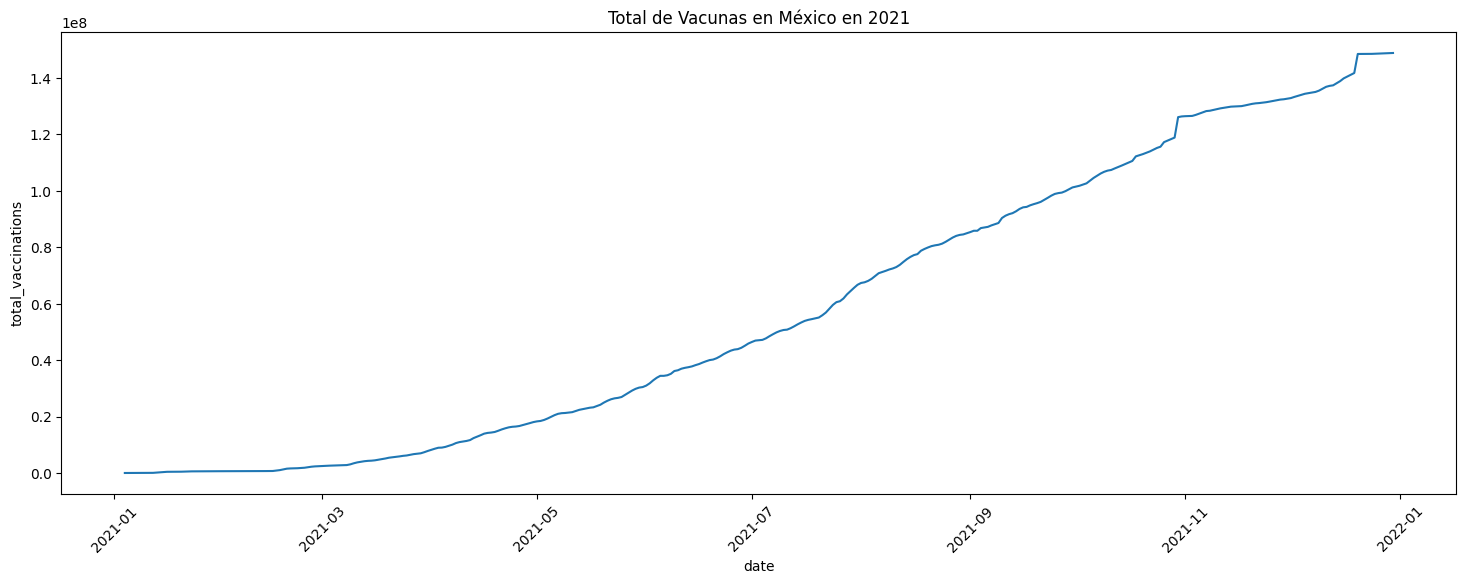

In [ ]:
plt.figure(figsize=(18,6))
sns.lineplot(data=mx_dos, x="date", y="total_vaccinations")
plt.title("Total de Vacunas en México en 2021")
plt.xticks(rotation=45)
plt.show()

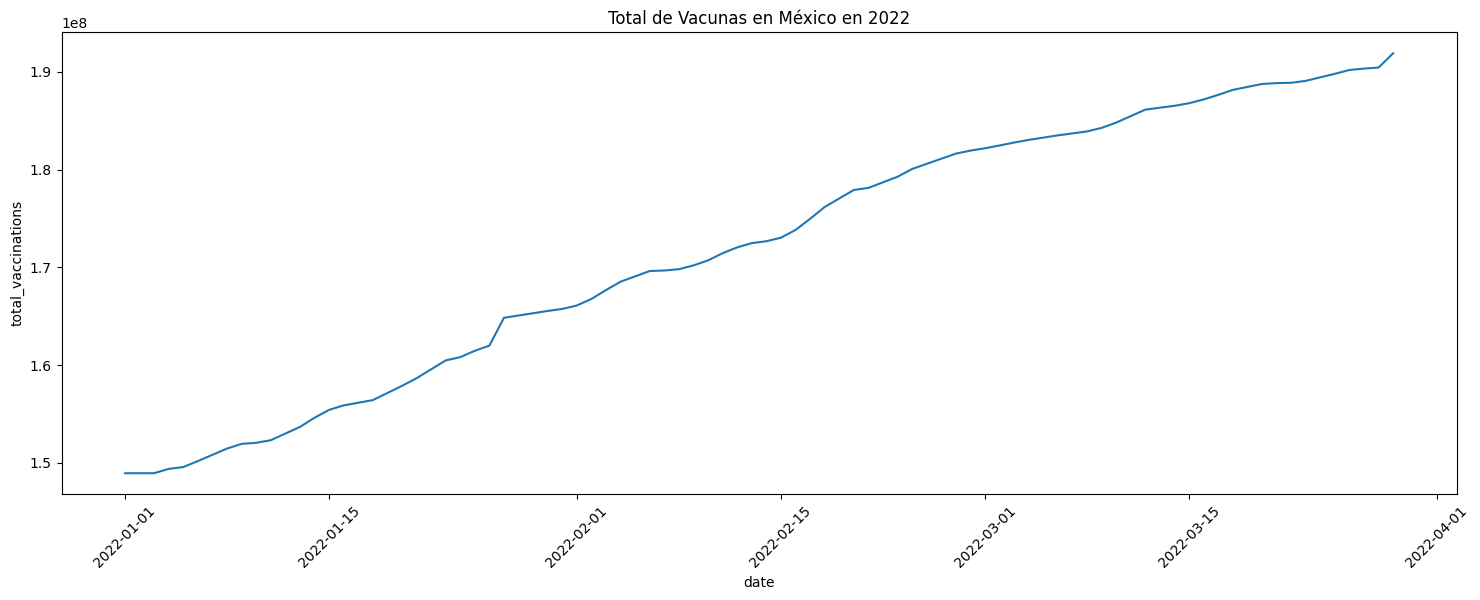

In [ ]:
plt.figure(figsize=(18,6))
sns.lineplot(data=mx_tres, x="date", y="total_vaccinations")
plt.title("Total de Vacunas en México en 2022")
plt.xticks(rotation=45)
plt.show()

####Comparación de Vacuans por día entre Marzo 2021 y Marzo 2022

In [ ]:
mx_marzo_uno = df_mx[(df_mx['date'] >= '2021-03-01') & (df_mx['date'] <= '2021-03-31')]
mx_marzo_dos = df_mx[(df_mx['date'] >= '2022-03-01') & (df_mx['date'] <= '2022-03-31')]

Text(0.5, 1.0, 'Vacunas por día, Marzo 2021')

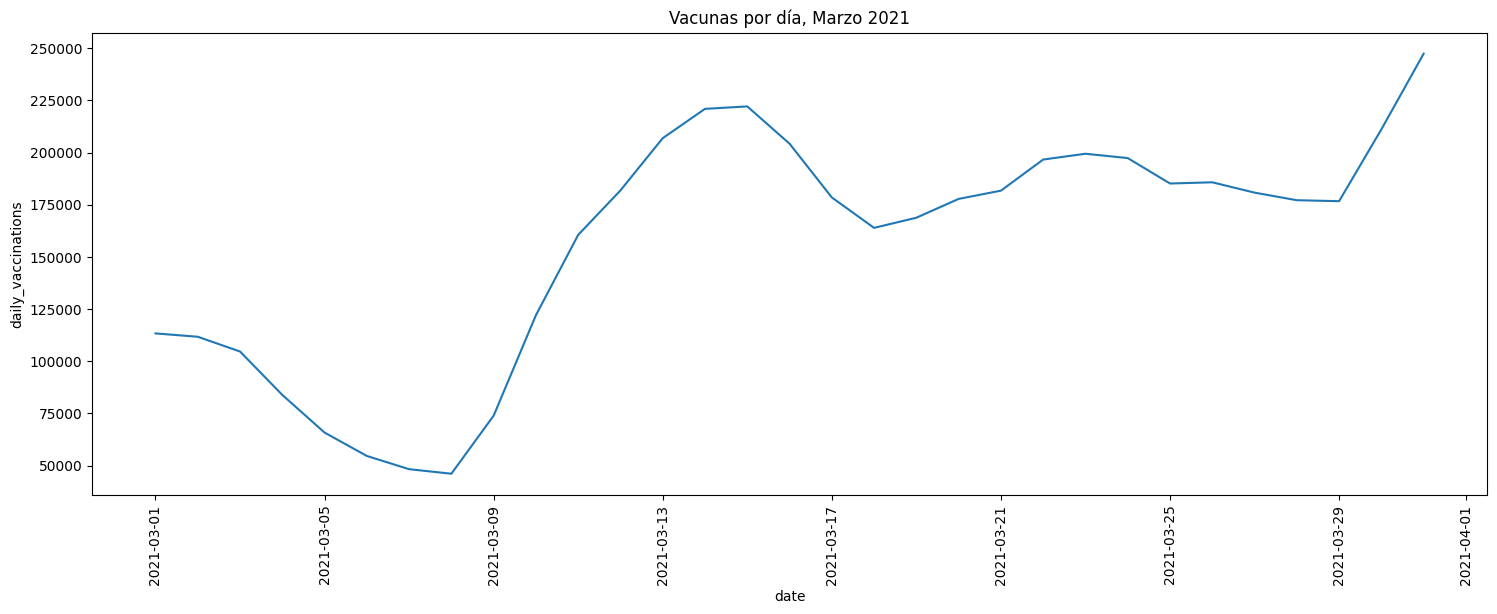

In [ ]:
plt.figure(figsize=(18,6))
sns.lineplot(data=mx_marzo_uno, x="date", y="daily_vaccinations")
plt.xticks(rotation=90)
plt.title("Vacunas por día, Marzo 2021")

Text(0.5, 1.0, 'Vacunas por día, Marzo 2022')

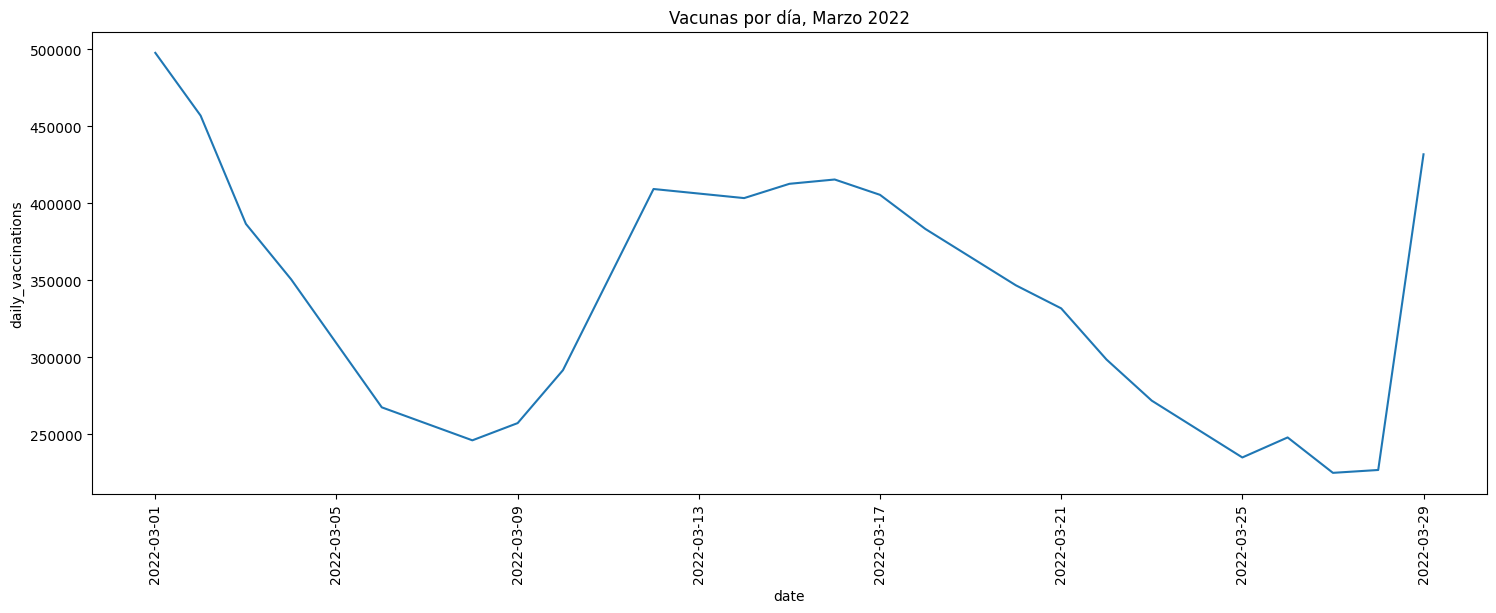

In [ ]:
plt.figure(figsize=(18,6))
sns.lineplot(data=mx_marzo_dos, x="date", y="daily_vaccinations")
plt.xticks(rotation=90)
plt.title("Vacunas por día, Marzo 2022")

###Comparación México - Brasil - India

In [ ]:
# Creamos un DataFrame que contenga la información de Brasil y otro con la información de India
df_br = data[data['country'] == 'Brazil'].copy()
df_in = data[data['country'] == 'India'].copy()

In [ ]:
#Eliminamos las columnas que no se van a usar
df_br.drop(["people_fully_vaccinated","daily_vaccinations_raw","people_fully_vaccinated_per_hundred","daily_vaccinations_per_million","people_vaccinated_per_hundred", "source_name","source_website"],axis=1, inplace=True)
df_in.drop(["people_fully_vaccinated","daily_vaccinations_raw","people_fully_vaccinated_per_hundred","daily_vaccinations_per_million","people_vaccinated_per_hundred", "source_name","source_website"],axis=1, inplace=True)

In [ ]:
df_br.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,vaccines
10649,Brazil,BRA,2021-01-17,112.0,112.0,0.0,0.00,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
10650,Brazil,BRA,2021-01-18,1109.0,1109.0,997.0,0.00,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
10651,Brazil,BRA,2021-01-19,13527.0,13527.0,6708.0,0.01,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
10652,Brazil,BRA,2021-01-20,105824.0,105824.0,35237.0,0.05,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
10653,Brazil,BRA,2021-01-21,193699.0,193699.0,48397.0,0.09,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."


In [ ]:
df_in.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,vaccines
35372,India,IND,2021-01-15,0.0,0.0,0.0,0.00,"Covaxin, Oxford/AstraZeneca, Sputnik V"
35373,India,IND,2021-01-16,191181.0,191181.0,191181.0,0.01,"Covaxin, Oxford/AstraZeneca, Sputnik V"
35374,India,IND,2021-01-17,224301.0,224301.0,112150.0,0.02,"Covaxin, Oxford/AstraZeneca, Sputnik V"
35375,India,IND,2021-01-18,454049.0,454049.0,151350.0,0.03,"Covaxin, Oxford/AstraZeneca, Sputnik V"
35376,India,IND,2021-01-19,674835.0,674835.0,168709.0,0.05,"Covaxin, Oxford/AstraZeneca, Sputnik V"


In [ ]:
#Combinamos los DataFrames en uno solo
mx_br_in = pd.concat([df_mx, df_br, df_in])

In [ ]:
#Ahora se compara el número total de vacunas por país hasta la ultima fecha del registro
va_total = mx_br_in.groupby('country').max().sort_values('total_vaccinations', ascending=False)
va_total = va_total.iloc[:10]
va_total

,iso_code,date,total_vaccinations,people_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,vaccines
country,,,,,,,
India,IND,2022-03-29,1.834501e+09,984838143.0,10037995.0,131.66,"Covaxin, Oxford/AstraZeneca, Sputnik V"
Brazil,BRA,2022-03-29,4.135596e+08,181078067.0,1941268.0,193.26,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
Mexico,MEX,2022-03-29,1.919079e+08,85580293.0,1648223.0,147.32,"CanSino, Johnson&Johnson, Moderna, Oxford/Astr..."


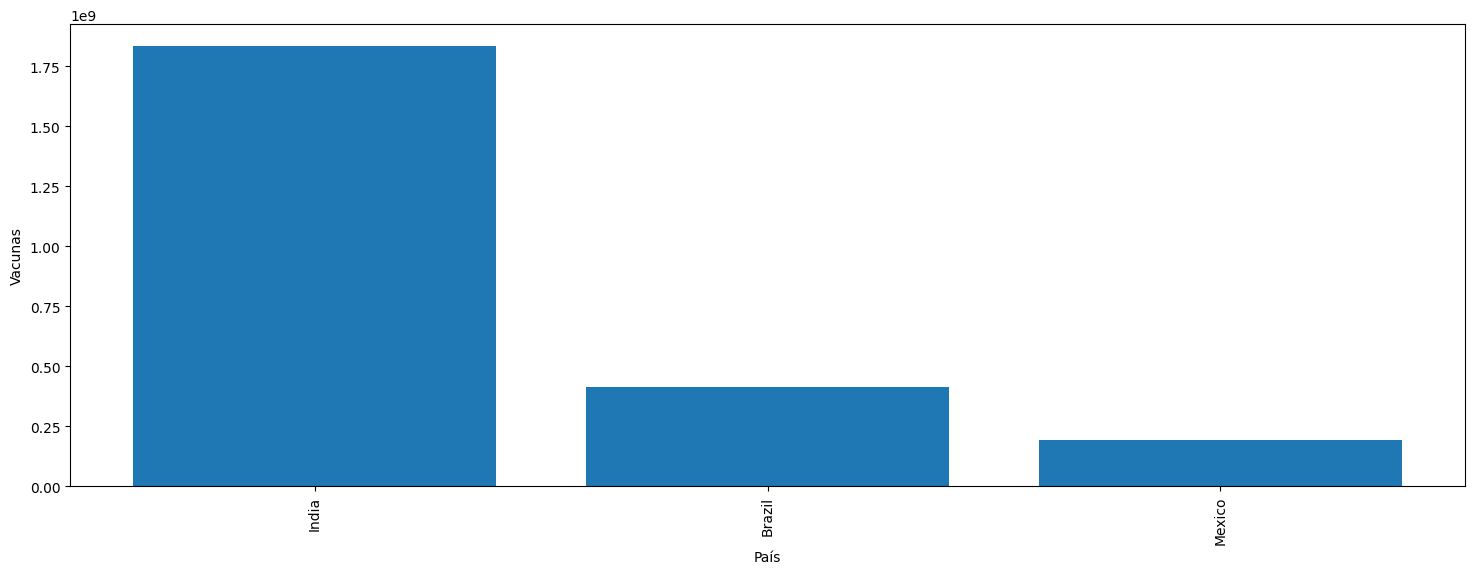

In [ ]:
plt.figure(figsize=(18, 6))
plt.bar(va_total.index, va_total.total_vaccinations)
plt.xticks(rotation = 90)
plt.ylabel('Vacunas')
plt.xlabel('País')
plt.show()

##Reto

###Columa de Fechas

In [7]:
# Revisamos el formato(data type) de las columnas
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86512 entries, 0 to 86511
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              86512 non-null  object 
 1   iso_code                             86512 non-null  object 
 2   date                                 86512 non-null  object 
 3   total_vaccinations                   43607 non-null  float64
 4   people_vaccinated                    41294 non-null  float64
 5   people_fully_vaccinated              38802 non-null  float64
 6   daily_vaccinations_raw               35362 non-null  float64
 7   daily_vaccinations                   86213 non-null  float64
 8   total_vaccinations_per_hundred       43607 non-null  float64
 9   people_vaccinated_per_hundred        41294 non-null  float64
 10  people_fully_vaccinated_per_hundred  38802 non-null  float64
 11  daily_vaccinations_per_milli

In [8]:
# La fecha se encuentra en formato de 'object', vamos a cambiarlo por 'date'
data['date'] =  pd.to_datetime(data['date'], format='%Y-%m-%d')

###Cantidad de vacunas aplicadas de cada compañía
Determinar la cantidad de vacunas aplicadas de cada compañía (con base en cómo lo reporta cada país en la columna vaccines, en otras palabras, agrupe por vaccines y realice la sumatoria).

In [9]:
# Se hace un groupby de la columna 'vaccines'
# y se clasifica por 'total_vaccinations' que es la suma del total de vacunas
cant_vacunas = data.groupby('vaccines').max().sort_values('total_vaccinations', ascending=False)
cant_vacunas.head(5)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,source_name,source_website
vaccines,,,,,,,,,,,,,,
"CanSino, Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac, ZF2001",China,CHN,2022-03-29,3.263129e+09,1.275541e+09,1.240777e+09,24741000.0,22424286.0,225.94,88.32,85.91,15527.0,National Health Commission,http://www.nhc.gov.cn/jkj/s7915/202203/d81d339...
"Covaxin, Oxford/AstraZeneca, Sputnik V",India,IND,2022-03-29,1.834501e+09,9.848381e+08,8.282295e+08,18627269.0,10037995.0,131.66,70.68,59.44,7204.0,Government of India,https://dashboard.cowin.gov.in/
"Johnson&Johnson, Moderna, Pfizer/BioNTech",United States,USA,2022-03-28,5.601818e+08,2.553624e+08,2.174990e+08,4555627.0,3506960.0,227.27,83.28,82.60,22995.0,Statens Serum Institute,https://opendata.swiss/en/dataset/covid-19-sch...
"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac",Brazil,BRA,2022-03-29,4.135596e+08,1.810781e+08,1.602729e+08,3976605.0,1941268.0,193.26,84.62,74.90,9072.0,State governments via coronavirusbra1.github.io,https://covid19.who.int/
"Johnson&Johnson, Moderna, Novavax, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sinovac",Indonesia,IDN,2022-03-29,3.771089e+08,1.962409e+08,1.588305e+08,2952259.0,1897011.0,136.45,71.01,57.47,6864.0,Government of Indonesia,https://data.covid19.go.id/public/index.html


###Vacunas a Nivel Mundial

In [10]:
va_mundial = data.total_vaccinations.sum()
va_mundial

2002854013761.0

###Promedio de Vacunas por Pais

In [20]:
promedio_por_pais = data.total_vaccinations.mean()
promedio_por_pais

45929644.638727725

###Vacunas en 29/01/21

In [21]:
# Primero se obtienen los datos referentes a ese día
va_dia_esp = data[(data['date'] == '2021-01-21')]
va_dia_esp.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
405,Albania,ALB,2021-01-21,549.0,549.0,NaN,30.0,40.0,0.02,0.02,NaN,14.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...",Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
2871,Argentina,ARG,2021-01-21,289666.0,261327.0,28316.0,14114.0,11570.0,0.64,0.57,0.06,254.0,"CanSino, Moderna, Oxford/AstraZeneca, Pfizer/B...",Ministry of Health,https://covidstats.com.ar/
4433,Austria,AUT,2021-01-21,NaN,NaN,NaN,NaN,13771.0,NaN,NaN,NaN,1523.0,"Johnson&Johnson, Moderna, Novavax, Oxford/Astr...",Ministry of Health,https://www.ecdc.europa.eu/en/publications-dat...
4866,Azerbaijan,AZE,2021-01-21,NaN,NaN,NaN,NaN,3250.0,NaN,NaN,NaN,318.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...",Government of Azerbaijan,https://koronavirusinfo.az
5706,Bahrain,BHR,2021-01-21,NaN,NaN,NaN,NaN,7712.0,NaN,NaN,NaN,4411.0,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",Ministry of Health,https://covid19.who.int/


In [22]:
# Ahora se hace la sumatoria
va_dia_esp_sum = va_dia_esp.total_vaccinations.sum()
va_dia_esp_sum

53783777.0

### DataFrame conDiferencias

In [23]:
##Primero Creamos el DF nuevo
conDiferencias = data.copy()
conDiferencias.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


In [24]:
# Se crea la nueva columna
conDiferencias['diferencias'] = data['daily_vaccinations'] - data['daily_vaccinations_raw']
conDiferencias.tail()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,diferencias
86507,Zimbabwe,ZWE,2022-03-25,8691642.0,4814582.0,3473523.0,139213.0,69579.0,57.59,31.90,23.02,4610.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...,-69634.0
86508,Zimbabwe,ZWE,2022-03-26,8791728.0,4886242.0,3487962.0,100086.0,83429.0,58.25,32.38,23.11,5528.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...,-16657.0
86509,Zimbabwe,ZWE,2022-03-27,8845039.0,4918147.0,3493763.0,53311.0,90629.0,58.61,32.59,23.15,6005.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...,37318.0
86510,Zimbabwe,ZWE,2022-03-28,8934360.0,4975433.0,3501493.0,89321.0,100614.0,59.20,32.97,23.20,6667.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...,11293.0
86511,Zimbabwe,ZWE,2022-03-29,9039729.0,5053114.0,3510256.0,105369.0,103751.0,59.90,33.48,23.26,6874.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...,-1618.0


### Periodo de tiempo

In [25]:
# Se determinan las fechas
fecha_mas_reciente = data['date'].max()
fecha_mas_antigua = data['date'].min()

In [26]:
# Se calcula la diferencia.
diferencia_fechas = fecha_mas_reciente - fecha_mas_antigua
diferencia_fechas

Timedelta('482 days 00:00:00')

###DataFrame conCantidad

In [27]:
# Se crea el DataFrame nuevo
conCantidad = data.copy()
conCantidad.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


In [28]:
# Se crea la columna nueva, se usa str.split para seprar por ',', y se calcula la longitud.
conCantidad['canVac'] = data['vaccines'].str.split(',').apply(lambda x: len(x))
conCantidad.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,canVac
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,4
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,4
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,4
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,4
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,4


### DataFrame antes20

In [29]:
antes20 = data[(data['date'] < '2020-12-20')]
antes20.tail()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
82362,United States,USA,2020-12-15,84638.0,76984.0,6281.0,49771.0,27175.0,0.03,0.02,0.0,82.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://data.cdc.gov/Vaccinations/COVID-19-Vac...
82363,United States,USA,2020-12-16,244549.0,231496.0,6757.0,159911.0,71420.0,0.07,0.07,0.0,215.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://data.cdc.gov/Vaccinations/COVID-19-Vac...
82364,United States,USA,2020-12-17,517161.0,496980.0,7507.0,272612.0,121718.0,0.16,0.15,0.0,367.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://data.cdc.gov/Vaccinations/COVID-19-Vac...
82365,United States,USA,2020-12-18,933551.0,904656.0,8718.0,416390.0,180653.0,0.28,0.27,0.0,544.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://data.cdc.gov/Vaccinations/COVID-19-Vac...
82366,United States,USA,2020-12-19,1115437.0,1082608.0,9778.0,181886.0,180858.0,0.34,0.33,0.0,545.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://data.cdc.gov/Vaccinations/COVID-19-Vac...


###DataFrame pfizer

In [30]:
# Se crea una serie booleana con str.contains para identificar los resultados que contengan 'Pfizer'
pfizer = data[data['vaccines'].str.contains('Pfizer')]
pfizer.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


###Excel de los DataFrames generados

In [ ]:
# Uso ExcelWriter de la libreria Pandas para guardar los DataFrame en un archivo Excel
with pd.ExcelWriter('resultadosReto.xlsx') as writer:
  conDiferencias.to_excel(writer, sheet_name='ConDiferencias', index=False)
  conCantidad.to_excel(writer, sheet_name='ConCantidad', index=False)
  antes20.to_excel(writer, sheet_name='Antes20', index=False)
  pfizer.to_excel(writer, sheet_name='Pfizer', index=False)


### Descarga del archivo

In [ ]:
# Se usa la libreria colab para realizar la descarga
files.download('resultadosReto.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>